In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_profiling
import sklearn.metrics as metrics
from pydantic.v1 import BaseSettings

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

# Setting Configurations:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/var/folders/ss/4jz_k5ws6hv7rqvyffmpszr00000gn/T/ipykernel_79570/1938408056.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# Load the Iris dataset into a Pandas DataFrame
data = pd.read_csv('./Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100,3.500,1.400,0.200,Iris-setosa
1,2,4.900,3.000,1.400,0.200,Iris-setosa
2,3,4.700,3.200,1.300,0.200,Iris-setosa
3,4,4.600,3.100,1.500,0.200,Iris-setosa
4,5,5.000,3.600,1.400,0.200,Iris-setosa


In [3]:
data.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unnecessary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

SepalLengthCm:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
SepalWidthCm:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
PetalLengthCm:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
PetalWidthCm:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [5]:
data.isnull().sum() # Checking for missing values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 3


In [7]:
data = data.drop_duplicates() # Drop duplicates
# Why are we dropping duplicates? Prevent overfitting, remove potential data-entry errors, not required IMO

data.describe() # Checking for outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000,147.000,147.000,147.000
mean,5.856,3.056,3.780,1.209
std,0.829,0.437,1.759,0.758
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.400,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [8]:
data.dtypes # Checking for the data types

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
data.shape # Checking for the shape of the dataset

(147, 5)

In [10]:
data.select_dtypes(include=[np.number]).corr() # Checking for the correlation
#If you're building a predictive model, highly correlated features can sometimes hurt model performance due
#to multicollinearity. You might consider using only one of a pair of highly correlated variables.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000,-0.109,0.871,0.817
SepalWidthCm,-0.109,1.000,-0.421,-0.356
PetalLengthCm,0.871,-0.421,1.000,0.962
PetalWidthCm,0.817,-0.356,0.962,1.000


In [12]:
data.select_dtypes(include=[np.number]).skew() # Calculate the skewness for all columns

SepalLengthCm    0.293
SepalWidthCm     0.324
PetalLengthCm   -0.294
PetalWidthCm    -0.113
dtype: float64

In [13]:
data.nunique() # Checking for the unique values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [14]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

In [15]:
data["Species"].value_counts() # Checking for the value counts

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

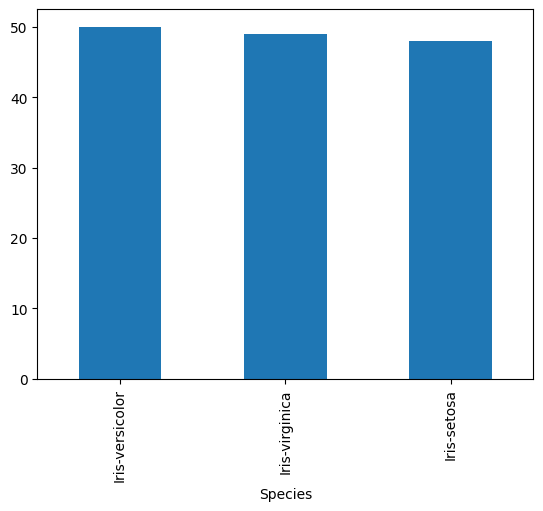

In [16]:
data['Species'].value_counts().plot(kind='bar') # Checking for the value counts
plt.show()

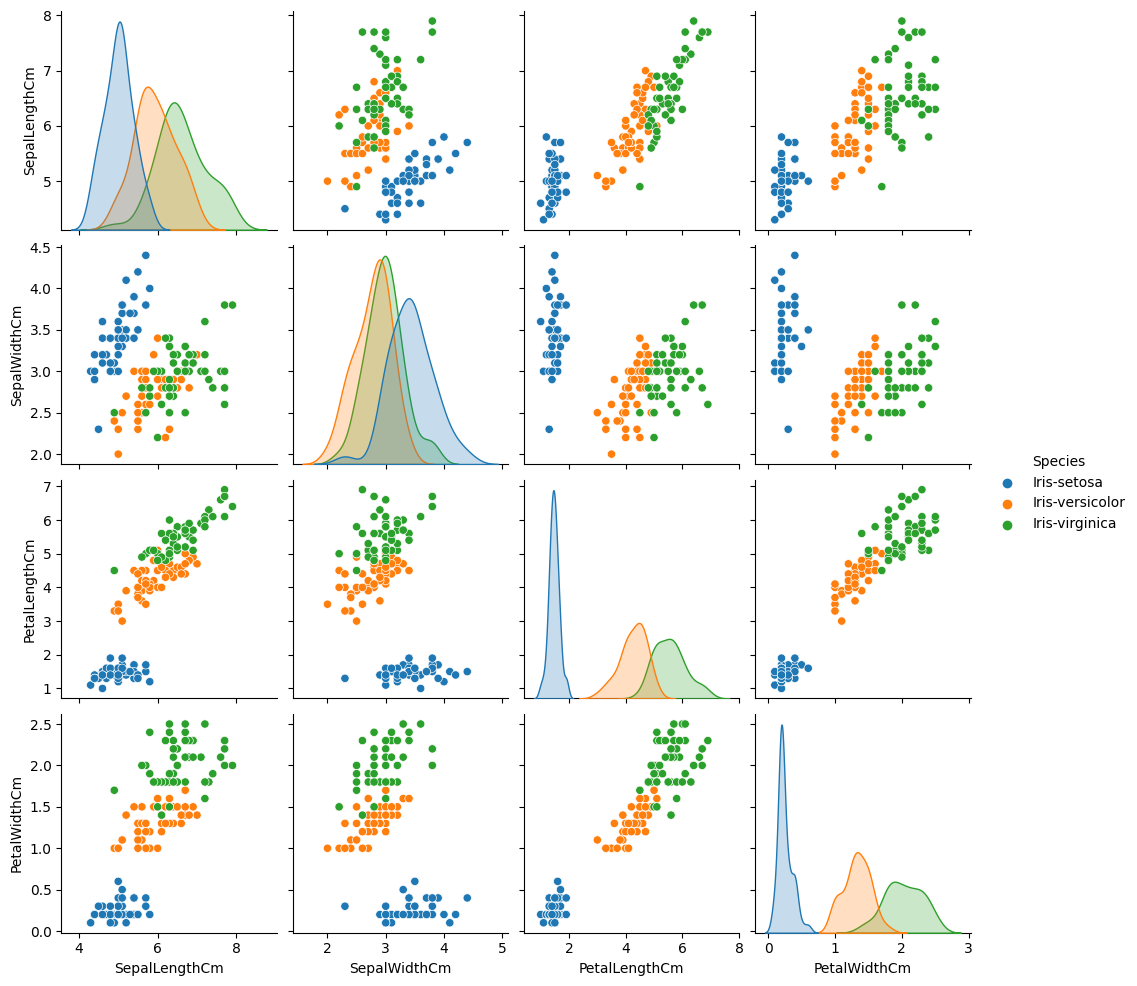

In [17]:
sns.pairplot(data,hue="Species") # Visualize the whole dataset
plt.show()

In [18]:
# We notice the correlations here to get a rough idea on how well we can predict

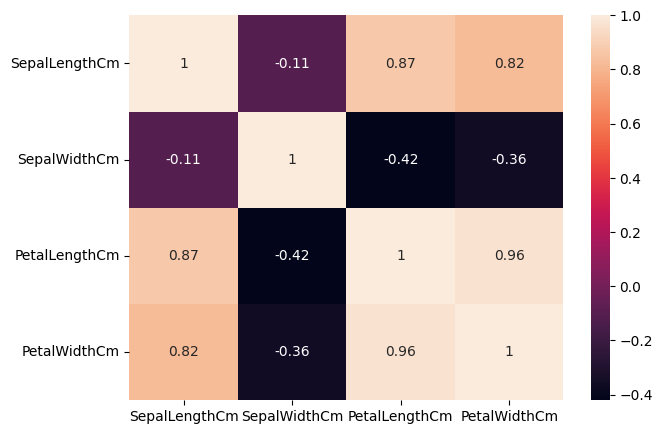

In [20]:
plt.figure(figsize=(7,5)) 
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True) # Plotting the heatmap
plt.show()

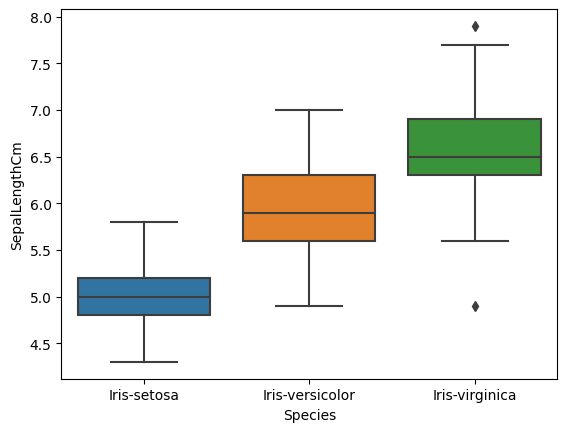

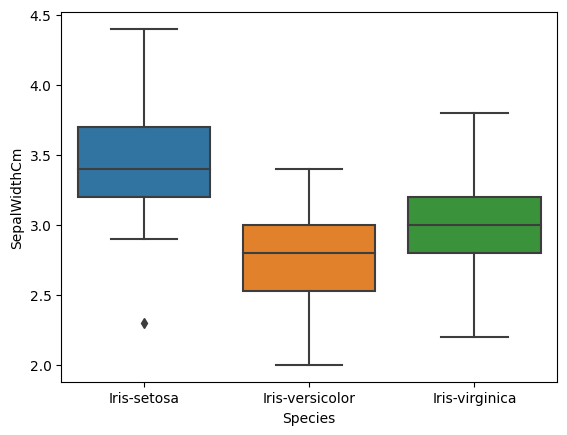

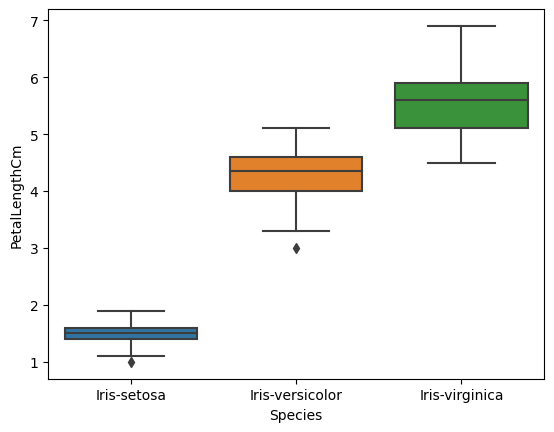

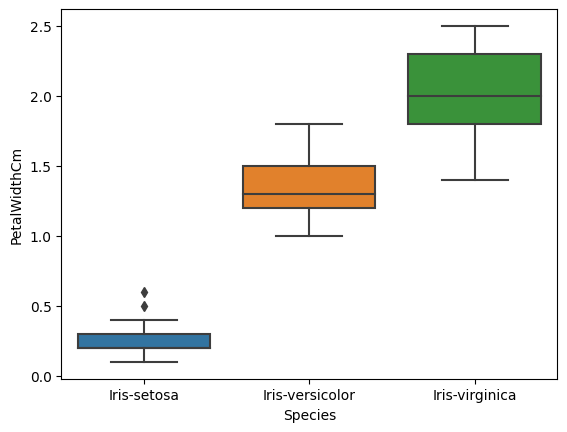

In [21]:
# Plotting the boxplot
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

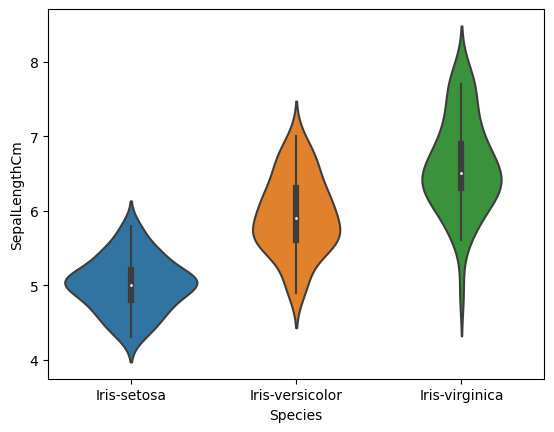

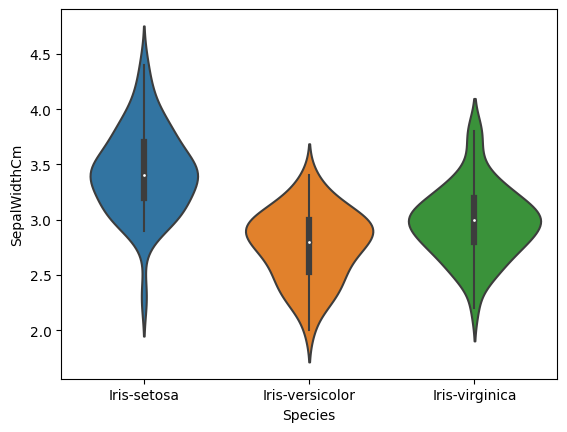

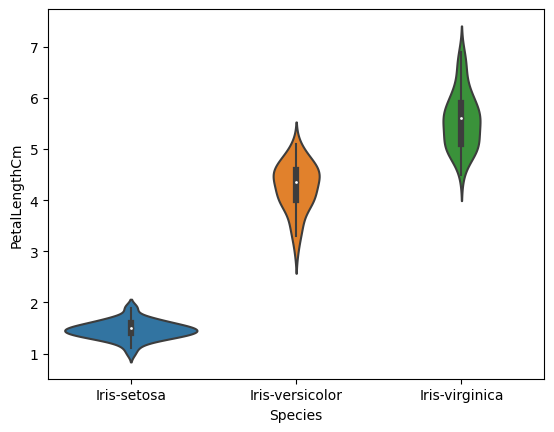

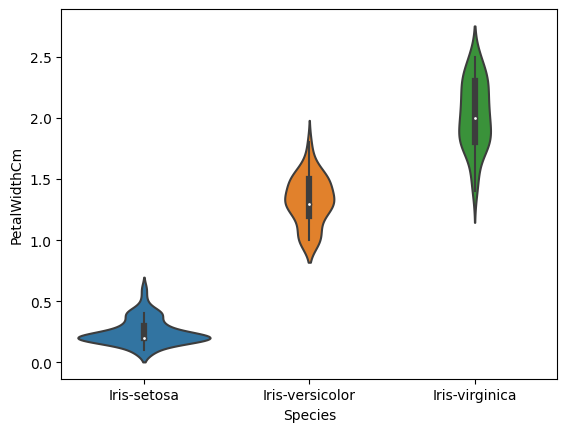

In [22]:
# Plotting the violinplot
sns.violinplot(x='Species', y='SepalLengthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='SepalWidthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='PetalLengthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

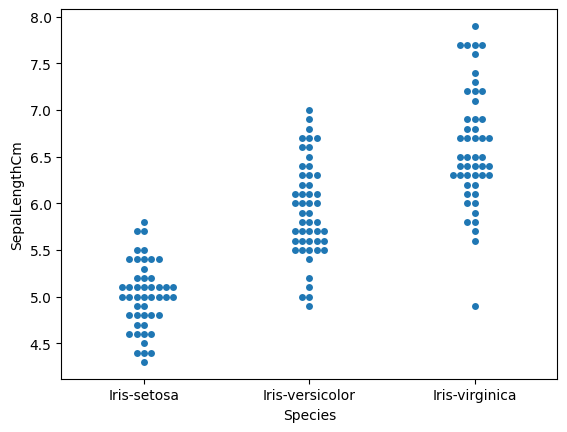

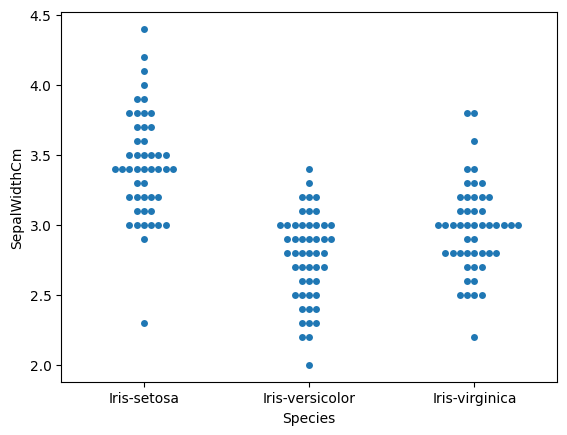

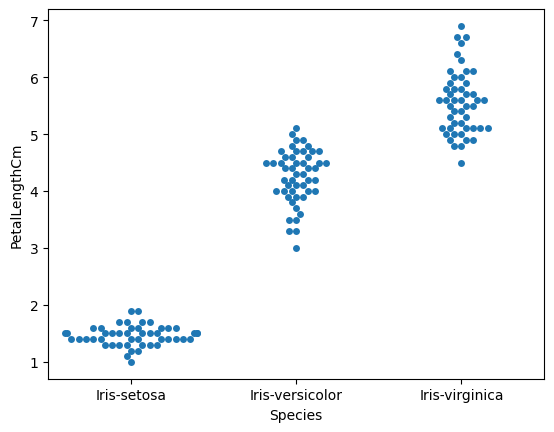

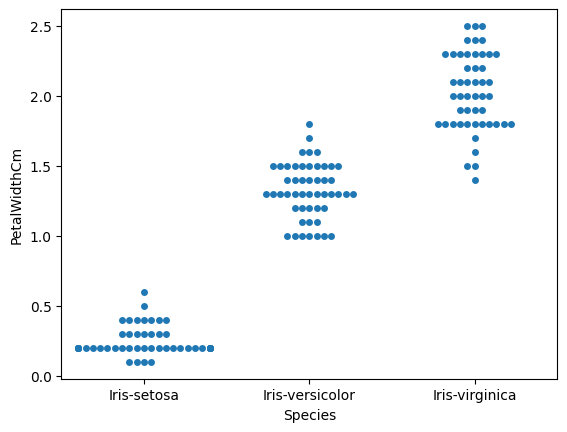

In [23]:
# Plotting the swarmplot
sns.swarmplot(x='Species', y='SepalLengthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='SepalWidthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='PetalLengthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

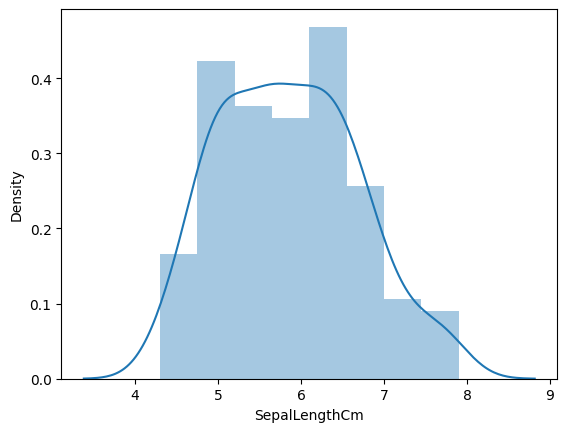

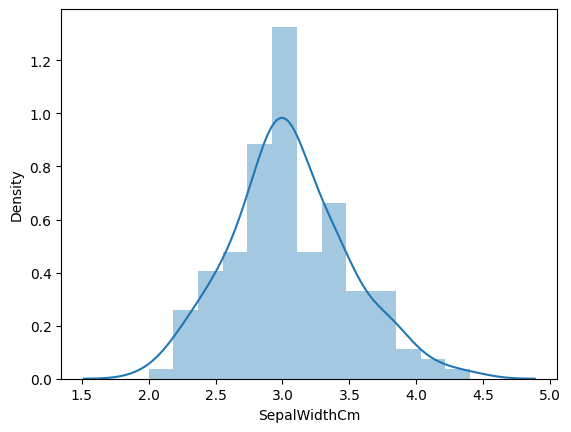

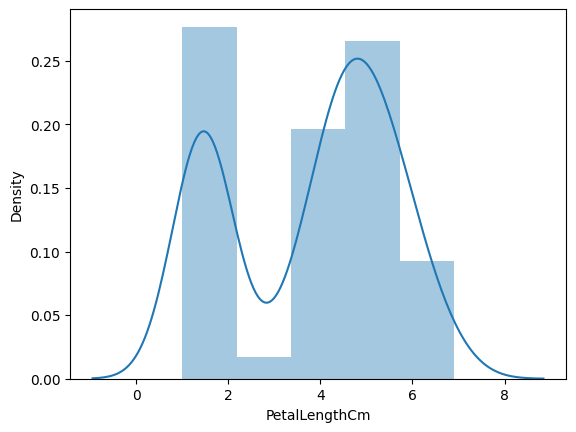

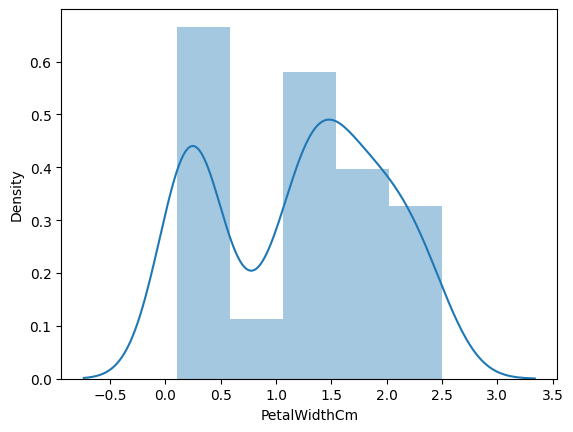

In [24]:
# Plotting the distplot
sns.distplot(data['SepalLengthCm'])
plt.show()

sns.distplot(data['SepalWidthCm'])
plt.show()

sns.distplot(data['PetalLengthCm'])
plt.show()

sns.distplot(data['PetalWidthCm'])
plt.show()

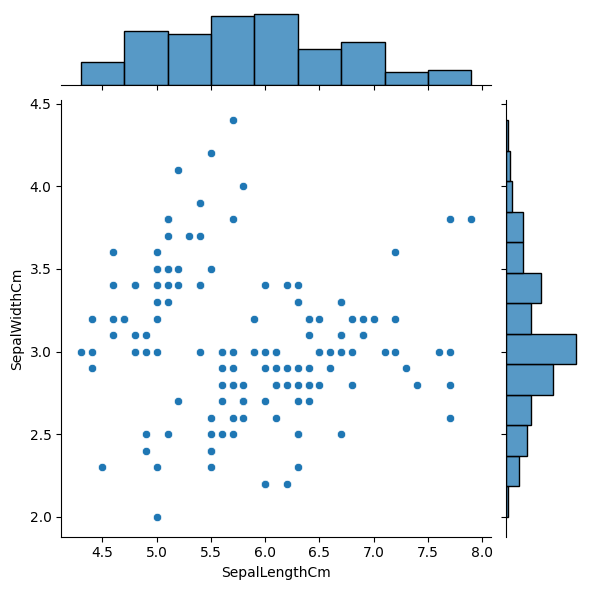

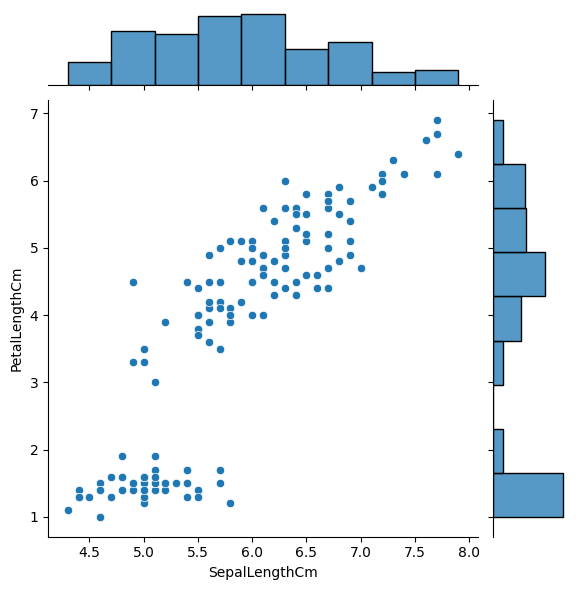

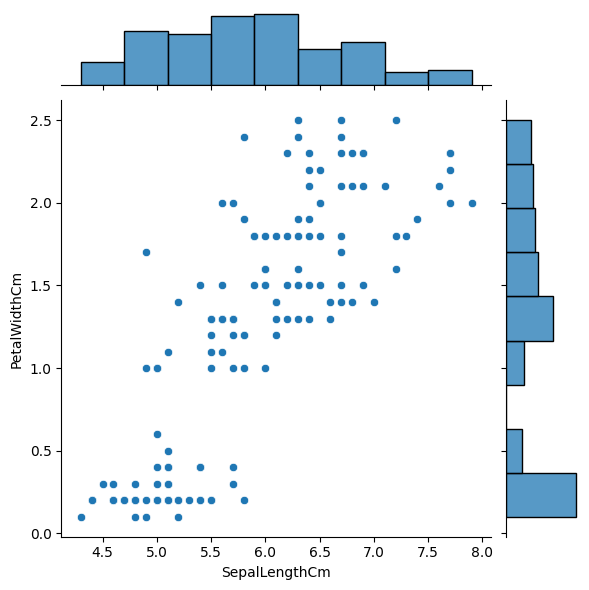

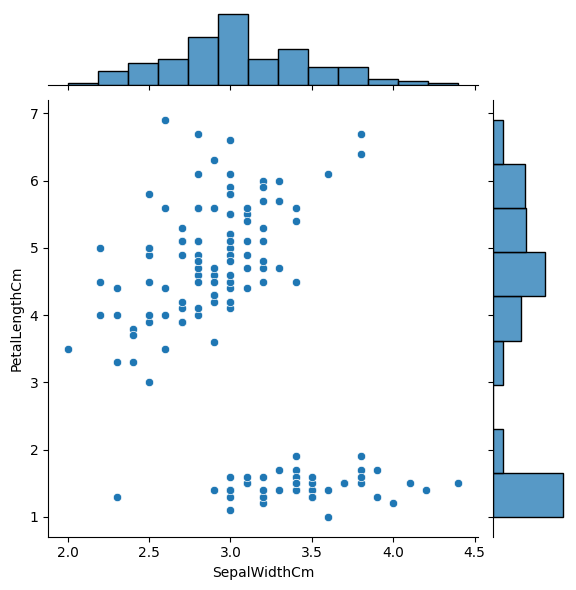

In [25]:
# Plotting the jointplot
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=data)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalLengthCm', data=data)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalWidthCm', data=data)
plt.show()

sns.jointplot(x='SepalWidthCm', y='PetalLengthCm', data=data)
plt.show()

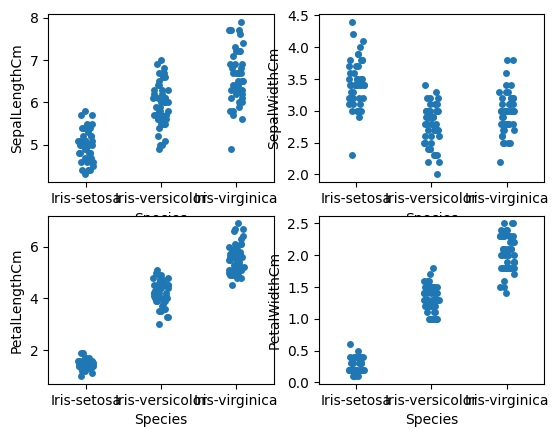

In [26]:
# Plotting the stripplot
# Create a figure with 4 subplots
fig, ax = plt.subplots(2, 2)

# Plot the first stripplot in the top left subplot
sns.stripplot(x='Species', y='SepalLengthCm', data=data, ax=ax[0, 0])

# Plot the second stripplot in the top right subplot
sns.stripplot(x='Species', y='SepalWidthCm', data=data, ax=ax[0, 1])

# Plot the third stripplot in the bottom left subplot
sns.stripplot(x='Species', y='PetalLengthCm', data=data, ax=ax[1, 0])

# Plot the fourth stripplot in the bottom right subplot
sns.stripplot(x='Species', y='PetalWidthCm', data=data, ax=ax[1, 1])

plt.show()

In [27]:
train, test = train_test_split(data, test_size = 0.3) # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(102, 5)
(45, 5)


In [28]:
X_train= train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]   # taking the training data features
y_train=train.Species                                                              # output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]      # taking test data features
y_test=test.Species                                                               #output value of test data

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9777777777777777


In [31]:
# Evaluate the performance of the model on the test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 0.9777777777777777


In [33]:
#KNN TIME
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 18  0]
 [ 0  1 14]]
accuracy is 0.9777777777777777


In [34]:
from sklearn import svm
model = svm.SVC() #select the algorithm
model.fit(X_train, y_train) # train the algorithm with the training data and the training output
prediction=model.predict(X_test) #pass the testing data to the trained algorithm
#check the accuracy of the algorithm. 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9777777777777777


In [35]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [37]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier  # For classification tasks

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now use the encoded labels to train the XGBoost model
model = XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

# If you need to convert predictions back to the original labels:
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_labels))
print(confusion_matrix(y_test, y_pred_labels))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_labels,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
accuracy is 0.9777777777777777


In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

model = XGBClassifier(objective='multi:softmax')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

print("Best parameters found: ", grid_search.best_params_)
model = grid_search.best_estimator_
print(model)

# Now you can use this model to predict and evaluate


Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)


In [44]:
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

# If you need to convert predictions back to the original labels:
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_labels))
print(confusion_matrix(y_test, y_pred_labels))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_labels,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]
accuracy is 0.9777777777777777
